# Testowanie Hipotez Statystycznych

### test t-studenta dla jednej próbki

In [4]:
import numpy as np
import matplotlib.pyplot as plt

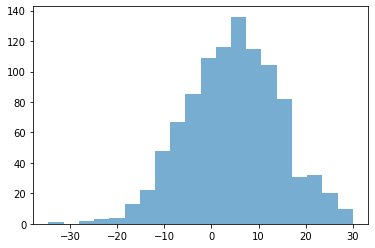

Ttest_1sampResult(statistic=14.585382191818757, pvalue=7.92410880757054e-44)
Ttest_1sampResult(statistic=8.21085542289713, pvalue=6.738737762068824e-16)
Ttest_1sampResult(statistic=0.24269696174509586, pvalue=0.8082899794044538)
Ttest_1sampResult(statistic=-1.350934730485311, pvalue=0.1770222291723873)
Ttest_1sampResult(statistic=-2.9445664227157176, pvalue=0.0033089947977429065)
Ttest_1sampResult(statistic=-4.538198114946124, pvalue=6.363476951206814e-06)


In [5]:
from scipy import stats

loc=5
scale=10
x = stats.norm.rvs(loc=loc, scale=scale, size=1_000)
x = np.random.normal(loc=loc, scale=scale, size=1_000)

plt.hist(x, alpha=0.6, bins=20)
plt.show()

print(stats.ttest_1samp(x, 0))
print(stats.ttest_1samp(x, 2))
print(stats.ttest_1samp(x, 4.5))
print(stats.ttest_1samp(x, 5))
print(stats.ttest_1samp(x, 5.5))
print(stats.ttest_1samp(x, 6))

In [6]:
print(stats.ttest_1samp(x, 0))
print(stats.ttest_1samp(x, 2))
print(stats.ttest_1samp(x, 4.5))
print(stats.ttest_1samp(x, 5))
print(stats.ttest_1samp(x, 5.5))
print(stats.ttest_1samp(x, 6))

Ttest_1sampResult(statistic=14.585382191818757, pvalue=7.92410880757054e-44)
Ttest_1sampResult(statistic=8.21085542289713, pvalue=6.738737762068824e-16)
Ttest_1sampResult(statistic=0.24269696174509586, pvalue=0.8082899794044538)
Ttest_1sampResult(statistic=-1.350934730485311, pvalue=0.1770222291723873)
Ttest_1sampResult(statistic=-2.9445664227157176, pvalue=0.0033089947977429065)
Ttest_1sampResult(statistic=-4.538198114946124, pvalue=6.363476951206814e-06)


### test t-studenta dla dwóch niezależnych próbek

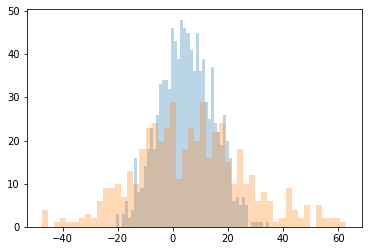

Ttest_indResult(statistic=-1.6001549294736914, pvalue=0.1097750795199064)


In [7]:
from scipy import stats

loc1 = 5
scale1 = 10
loc2 = 5
scale2 = 20
# x = stats.norm.rvs(loc=loc, scale=scale, size=1_000)
x1 = np.random.normal(loc=loc1, scale=scale1, size=1_000)
x2 = np.random.normal(loc=loc2, scale=scale2, size=500)

plt.hist(x1, alpha=0.3, bins=50)
plt.hist(x2, alpha=0.3, bins=50)
plt.show()

print(stats.ttest_ind(x1, x2))

### test t-studenta dla dwóch zależnych próbek

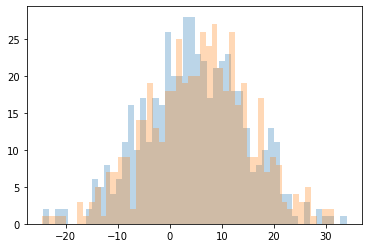

Ttest_relResult(statistic=-1.5651036749900684, pvalue=0.11819252036367099)


In [8]:
from scipy import stats

loc = 5
scale = 10

x1 = stats.norm.rvs(loc=loc, scale=scale, size=500)
x2 = (stats.norm.rvs(loc=loc, scale=scale, size=500)
         + stats.norm.rvs(scale=0.2, size=500))

plt.hist(x1, alpha=0.3, bins=50)
plt.hist(x2, alpha=0.3, bins=50)
plt.show()

print(stats.ttest_rel(x1, x2))

### Test normalności rozkładu

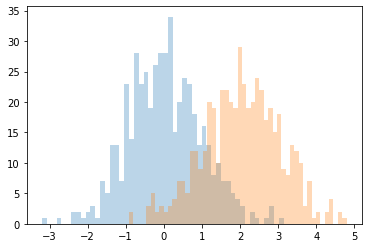

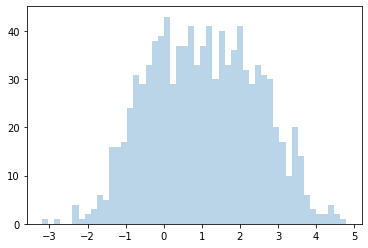

NormaltestResult(statistic=38.55056550424104, pvalue=4.2545248400491055e-09)

In [9]:
from scipy import stats

x1 = stats.norm.rvs(loc=0, scale=1, size=500)
x2 = stats.norm.rvs(loc=2, scale=1, size=500)

x = np.concatenate((x1, x2))

plt.hist(x1, alpha=0.3, bins=50)
plt.hist(x2, alpha=0.3, bins=50)
plt.show()

plt.hist(x, alpha=0.3, bins=50)
plt.show()

stats.normaltest(x)

### test Kołomorgowa-Smirnowa

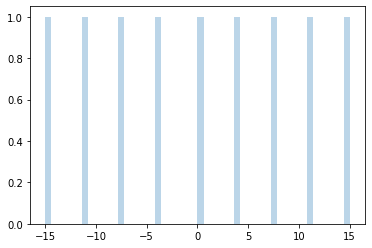

KstestResult(statistic=0.4443560271592436, pvalue=0.03885014008678778)


In [10]:
from scipy import stats

x = np.linspace(-15, 15, 9)

plt.hist(x, alpha=0.3, bins=50)
plt.show()

print(stats.kstest(x, 'norm'))

### Test shapiro-wilka

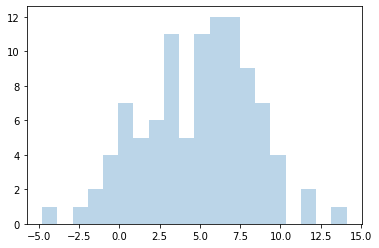

ShapiroResult(statistic=0.9903246164321899, pvalue=0.6908432245254517)


In [11]:
from scipy import stats

x = stats.norm.rvs(loc=5, scale=3, size=100)
plt.hist(x, alpha=0.3, bins=20)
plt.show()

print(stats.shapiro(x))

<hr>

In [14]:
%%bash
jupyter nbconvert \
    --to html Hipotezy.ipynb \
    --output-dir ./HTML

[NbConvertApp] Converting notebook Hipotezy.ipynb to html
[NbConvertApp] Writing 640756 bytes to HTML/Hipotezy.html


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

PATH = "data/napoje.csv"

alpha = 0.05

drinks_data = pd.read_csv(PATH, sep=';', na_values='.')

In [2]:
drinks_data

,mies,rok,pepsi,fanta,żywiec,okocim,regionalne,cola,lech
0,1,2001,108447,43302,186385,54301,45065,227013,56306
1,2,2001,105439,46711,168782,68131,43933,221115,67212
2,3,2001,111675,36029,172186,63104,46663,222812,67398
3,4,2001,113232,33659,172445,50871,45195,238631,57100
4,5,2001,110274,40853,174526,67924,47926,222963,65001
...,...,...,...,...,...,...,...,...,...
187,8,2016,105949,43017,169329,64262,58101,222531,58037
188,9,2016,103420,44310,173923,67591,44565,230270,65156
189,10,2016,120363,50688,175856,63791,51376,247155,59276
190,11,2016,101215,41924,175914,62570,59505,240524,61765


Hipothesis rejected!
p-value: 0.0000


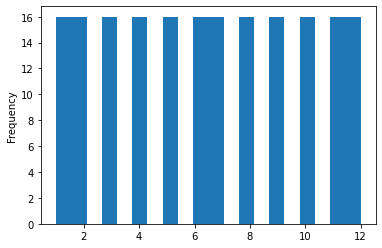

Hipothesis rejected!
p-value: 0.0000


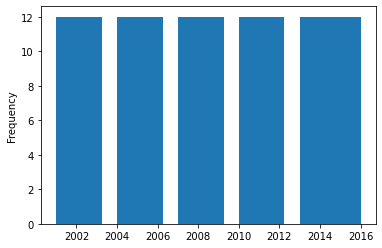

Hipothesis accepted
p-value: 0.7200


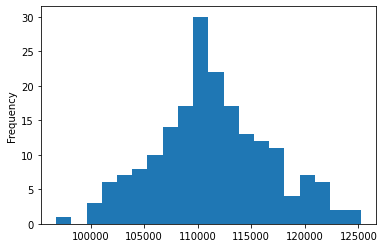

Hipothesis accepted
p-value: 0.1827


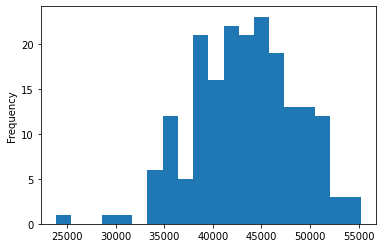

Hipothesis accepted
p-value: 0.3402


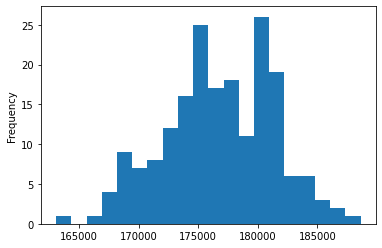

Hipothesis accepted
p-value: 0.1265


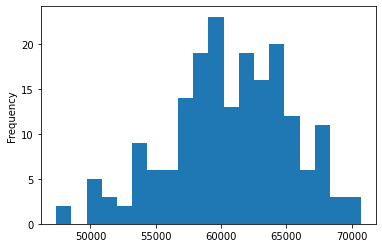

Hipothesis rejected!
p-value: 0.0000


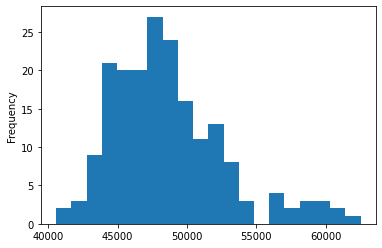

Hipothesis accepted
p-value: 0.5359


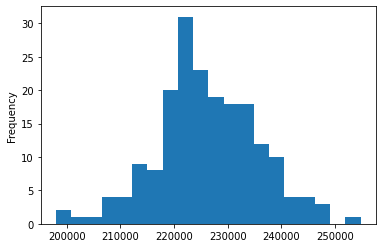

Hipothesis accepted
p-value: 0.4732


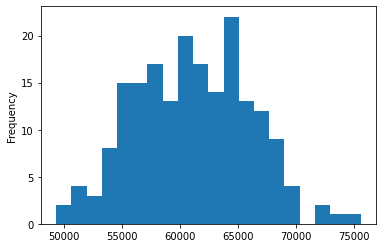

In [3]:
for column in drinks_data.columns:
    one_drink_data = drinks_data[column]
    normal_results = sps.normaltest(one_drink_data)

    p_val = normal_results.pvalue
    if p_val < alpha:
        print("Hipothesis rejected!")
    else:
        print("Hipothesis accepted")
        
    print(f"p-value: {p_val:.4f}")
    one_drink_data.plot.hist(bins=20)
    plt.show()

In [4]:
drink_types = ['lech', 'cola', 'regionalne']

mean_values = [60500, 222000, 43500]

for k in range(0, len(mean_values)):
    result = sps.ttest_1samp(drinks_data[drink_types[k]], mean_values[k])
    print('Mean %s: %.2f. Tested value: %.2f' % (drink_types[k], drinks_data[drink_types[k]].mean(),mean_values[k]))
    print(f"p-value: {result.pvalue:.4f}")
    if result.pvalue < alpha:
        print("Hipothesis rejected!")
    else:
        print("Hipothesis accepted")
    print()

Mean lech: 61091.35. Tested value: 60500.00
p-value: 0.1013
Hipothesis accepted

Mean cola: 226389.47. Tested value: 222000.00
p-value: 0.0000
Hipothesis rejected!

Mean regionalne: 48668.04. Tested value: 43500.00
p-value: 0.0000
Hipothesis rejected!

